In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
dataset=pd.read_csv('OnlineRetail.csv', sep=',',encoding="ISO-8859-1", header=0)

In [3]:
dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
dataset.shape

(62641, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62641 entries, 0 to 62640
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    62641 non-null  object 
 1   StockCode    62641 non-null  object 
 2   Description  62478 non-null  object 
 3   Quantity     62640 non-null  float64
 4   InvoiceDate  62640 non-null  object 
 5   UnitPrice    62640 non-null  float64
 6   CustomerID   38513 non-null  float64
 7   Country      62640 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.8+ MB


In [6]:
dataset.isnull().sum()

InvoiceNo          0
StockCode          0
Description      163
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     24128
Country            1
dtype: int64

In [7]:
dataset=dataset.dropna()
dataset.shape

(38513, 8)

In [8]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#converting customerID from float to string

dataset["CustomerID"]=dataset["CustomerID"].astype("str")

In [10]:
dataset['amount']=dataset['Quantity']*dataset['UnitPrice']
monetary=dataset.groupby('CustomerID')['amount'].sum().reset_index()
monetary.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,711.79
2,12348.0,892.80
3,12356.0,2271.62
4,12359.0,547.50


In [11]:
frequency=dataset.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns=['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,31
2,12348.0,17
3,12356.0,36
4,12359.0,16


In [12]:
rfm=pd.merge(monetary,frequency,on='CustomerID')
rfm.head()

,CustomerID,amount,Frequency
0,12346.0,0.00,2
1,12347.0,711.79,31
2,12348.0,892.80,17
3,12356.0,2271.62,36
4,12359.0,547.50,16


In [13]:
dataset['InvoiceDate']=pd.to_datetime(dataset['InvoiceDate'], format='%d-%m-%Y %H:%M')
maxdate=max(dataset['InvoiceDate'])
dataset['Differenc']=maxdate-dataset['InvoiceDate']
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Differenc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,48 days 08:05:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,48 days 08:05:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,48 days 08:05:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,48 days 08:05:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,48 days 08:05:00


In [14]:
recency=dataset.groupby('CustomerID')['Differenc'].min().reset_index()
recency.head()

,CustomerID,Differenc
0,12346.0,0 days 06:14:00
1,12347.0,42 days 01:34:00
2,12348.0,32 days 21:22:00
3,12356.0,0 days 06:41:00
4,12359.0,6 days 03:48:00


In [15]:
recency['Differenc']=recency['Differenc'].dt.days
recency.head()

,CustomerID,Differenc
0,12346.0,0
1,12347.0,42
2,12348.0,32
3,12356.0,0
4,12359.0,6


In [16]:

recency = recency.rename(columns={'Differenc': 'Recency'})
rfm = pd.merge(rfm, recency, on='CustomerID', how='inner')
rfm.head()

,CustomerID,amount,Frequency,Recency
0,12346.0,0.00,2,0
1,12347.0,711.79,31,42
2,12348.0,892.80,17,32
3,12356.0,2271.62,36,0
4,12359.0,547.50,16,6


Text(0, 0.5, 'Attributes')

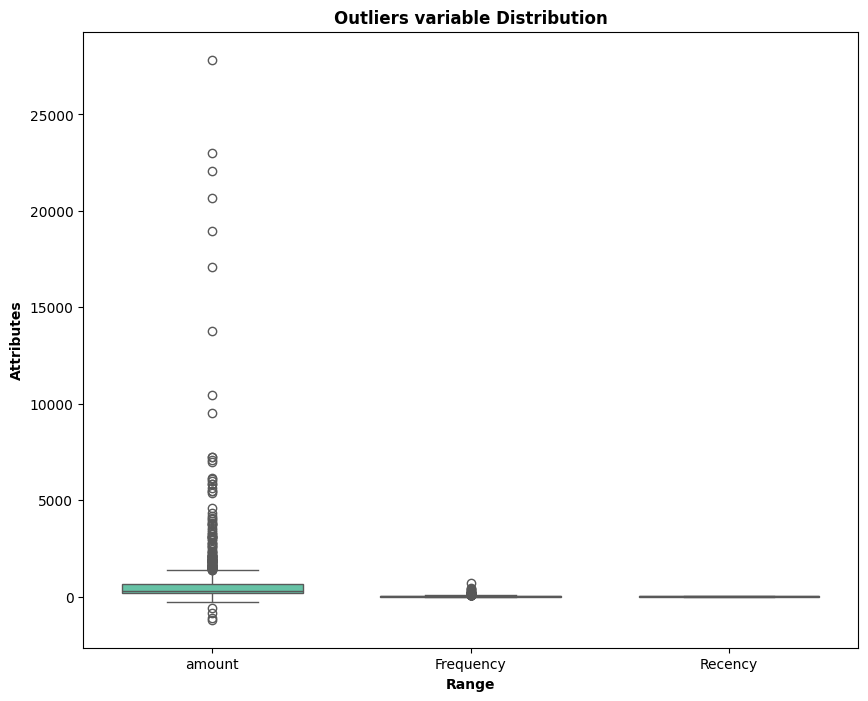

In [17]:
attributes=['amount','Frequency', 'Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes], orient="v", palette='Set2', whis=1.5,saturation=1,width=0.7)
plt.title("Outliers variable Distribution", fontsize=12, fontweight='bold')
plt.xlabel("Range", fontweight='bold')
plt.ylabel("Attributes", fontweight='bold')

In [18]:
#Removing outliers using quantalising method
#Amount
Q1=rfm.amount.quantile(0.05)
Q3=rfm.amount.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.amount>=Q1-1.5*IQR) & (rfm.amount<=Q3+1.5*IQR)]


#Frequency

Q1=rfm.Frequency.quantile(0.05)
Q3=rfm.Frequency.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Frequency>=Q1-1.5*IQR) & (rfm.Frequency<=Q3+1.5*IQR)]



#Recency

Q1=rfm.Recency.quantile(0.05)
Q3=rfm.Recency.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Recency>=Q1-1.5*IQR) & (rfm.Recency<=Q3+1.5*IQR)]

In [19]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
rfm_std=sc.fit_transform(rfm[attributes])
rfm_std=pd.DataFrame(rfm_std)
rfm_std.columns=attributes
rfm_std.head()

,amount,Frequency,Recency
0,-0.821625,-0.895915,-1.604356
1,0.325878,0.055717,1.002615
2,0.617691,-0.403692,0.381907
3,2.840538,0.219791,-1.604356
4,0.061020,-0.436507,-1.231932


In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [21]:
kmeans.labels_

array([1, 2, 2, ..., 1, 2, 1], dtype=int32)

In [22]:
set(kmeans.labels_)

{0, 1, 2, 3}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

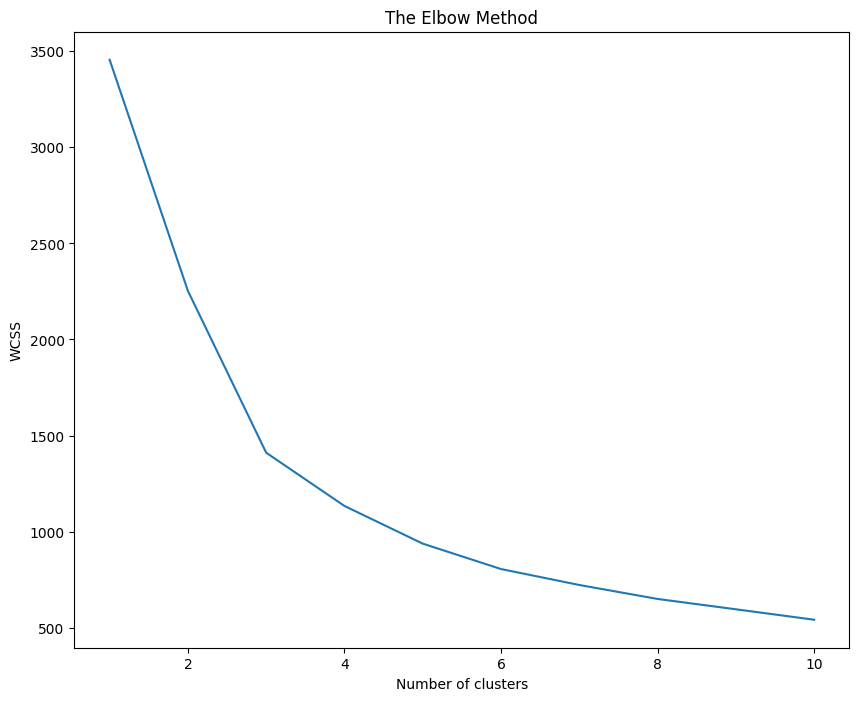

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans=KMeans(n_clusters=3, max_iter=500)
kmeans.fit(rfm_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [30]:
labels=kmeans.labels_

In [29]:
set(kmeans.labels_)

{0, 1, 2}

In [31]:
rfm_std['label']=labels
rfm_std.head()

,amount,Frequency,Recency,label
0,-0.821625,-0.895915,-1.604356,2
1,0.325878,0.055717,1.002615,0
2,0.617691,-0.403692,0.381907,0
3,2.840538,0.219791,-1.604356,1
4,0.061020,-0.436507,-1.231932,2


In [32]:
from re import X
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(rfm_std.drop('label', axis=1), rfm_std['label'], test_size=0.2, random_state=42)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
results=classifier.predict(X_test)

In [36]:
print(np.column_stack((results,y_test)))

[[2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 2]

The accuracy score is: 98.7012987012987 %


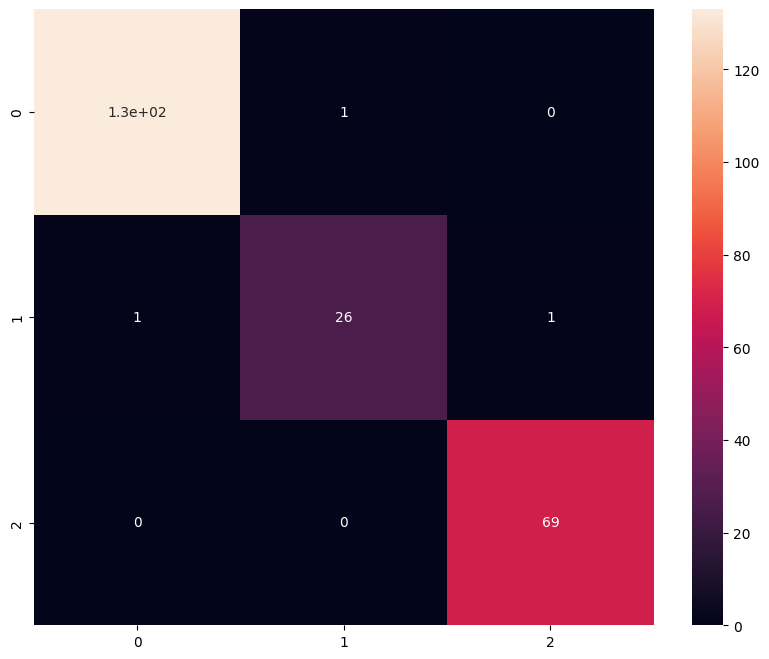

In [43]:
cm=confusion_matrix(results,y_test)
sns.heatmap(cm, annot=True)
print("The accuracy score is:", 100*accuracy_score(results,y_test),"%")

<Axes: xlabel='label', ylabel='amount'>

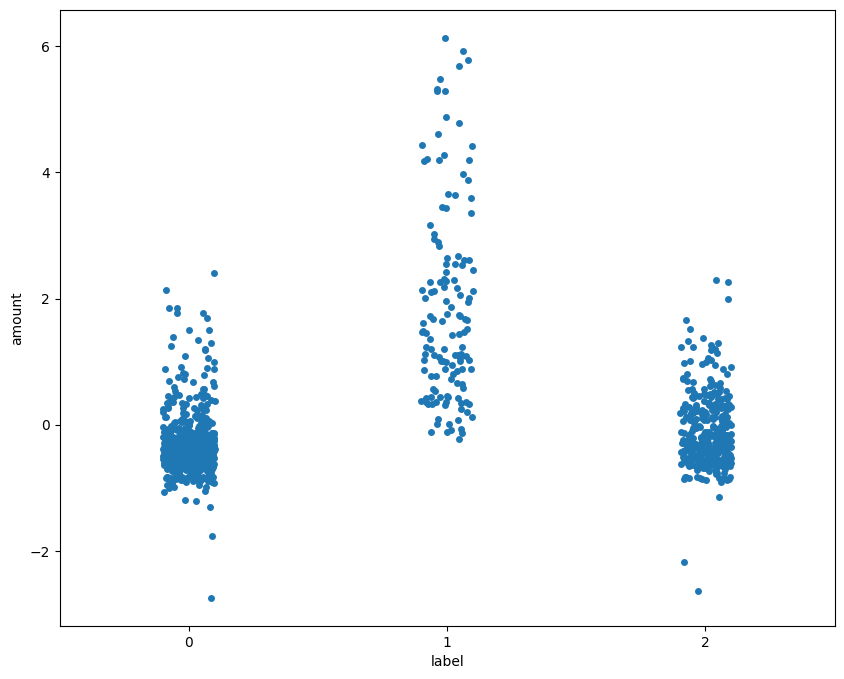

In [39]:
sns.stripplot(x='label', y='amount', data=rfm_std)